## Problem Statement
X Education receives a large number of leads daily, but their current lead conversion rate is only around 30%. The company needs to improve the efficiency of their sales process by identifying and targeting the most promising leads, also known as 'Hot Leads'. This requires developing a predictive model to score each lead based on their likelihood of conversion.

## Business Goal
The primary goal is to build a logistic regression model that assigns a lead score between 0 and 100 to each lead, allowing X Education to focus on leads with a higher probability of conversion. The target is to increase the lead conversion rate to approximately 80% by prioritizing high-potential leads and optimizing the sales team’s efforts.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#setting option to display all columns
pd.set_option("display.max_columns",None)

#setting option to display all rows
pd.set_option("display.max_rows",None)

### Step 1: Reading and Understanding the Data (EDA)

In [2]:
# Importing dataset
lead_score_df = pd.read_csv('Leads.csv')

In [3]:
# Let's see the head of our master dataset
lead_score_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Let's check the dimensions of the dataframe
lead_score_df.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
lead_score_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Let's see the type of each column
lead_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see missing values in the data so we need to take proper approch on this also there are few categorical variables present in this dataset for which we will need to create dummy variables.

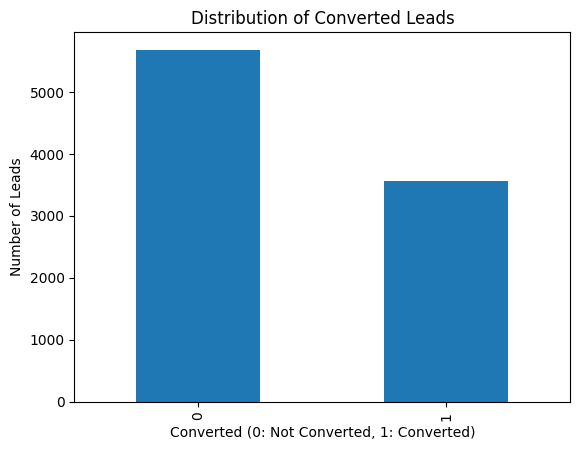

Converted
0    5679
1    3561
Name: count, dtype: int64


In [7]:
# Visual representation of 'Converted' value counts
lead_score_df['Converted'].value_counts().plot(kind='bar')
plt.title('Distribution of Converted Leads')
plt.xlabel('Converted (0: Not Converted, 1: Converted)')
plt.ylabel('Number of Leads')
plt.show()
print(lead_score_df['Converted'].value_counts())

In [8]:
# Data quality check #

# Loop through all categorical columns
for column in lead_score_df.select_dtypes(include=['object']).columns:
    # Get the value counts for the current column, including NaN values
    value_counts = lead_score_df[column].value_counts(dropna=False)

    # Calculate the percentage of each value
    value_percentages = (value_counts / len(lead_score_df)) * 100

    # Combine counts and percentages into a DataFrame for better readability
    value_summary = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_percentages
    })

    # Print the value counts and percentages for the current column
    print(value_summary)
    print('====================================================================================')  # Print a newline for better readability between columns


                                      Count  Percentage
Prospect ID                                            
7927b2df-8bba-4d29-b9a2-b6e0beafe620      1    0.010823
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea      1    0.010823
46befc49-253a-419b-abea-2fd978d2e2b1      1    0.010823
9d35a2c2-09d8-439f-9875-0e8bbf267f5a      1    0.010823
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5      1    0.010823
446a290f-b78f-413b-8912-d9c79a847e3a      1    0.010823
38826741-ffe2-4d37-89c4-1140c66c5560      1    0.010823
f08604ae-a2fa-4d64-8a42-a95ff2bddfed      1    0.010823
ce9c2fa0-d2ff-493d-82a9-20c81b175b3e      1    0.010823
13e3716d-528a-4e90-a441-51ab1d0184d1      1    0.010823
0047124c-2a76-4c2d-b4e4-83cb2331dbec      1    0.010823
9608eda6-d8bb-45ec-ab12-eb3c49d52b0f      1    0.010823
07a52472-4b5d-446f-9048-ffdc7bc65e96      1    0.010823
804e0cfb-559d-4a63-a635-573f7cfdf441      1    0.010823
65954c34-8ce7-4d9b-8ae0-f15f15bc9055      1    0.010823
e02efa11-5bf6-40ee-9194-75d3fffef1d3      1    0

                              Count  Percentage
Last Activity                                  
Email Opened                   3437   37.196970
SMS Sent                       2745   29.707792
Olark Chat Conversation         973   10.530303
Page Visited on Website         640    6.926407
Converted to Lead               428    4.632035
Email Bounced                   326    3.528139
Email Link Clicked              267    2.889610
Form Submitted on Website       116    1.255411
NaN                             103    1.114719
Unreachable                      93    1.006494
Unsubscribed                     61    0.660173
Had a Phone Conversation         30    0.324675
Approached upfront                9    0.097403
View in browser link Clicked      6    0.064935
Email Received                    2    0.021645
Email Marked Spam                 2    0.021645
Visited Booth in Tradeshow        1    0.010823
Resubscribed to emails            1    0.010823
                      Count  Percentage


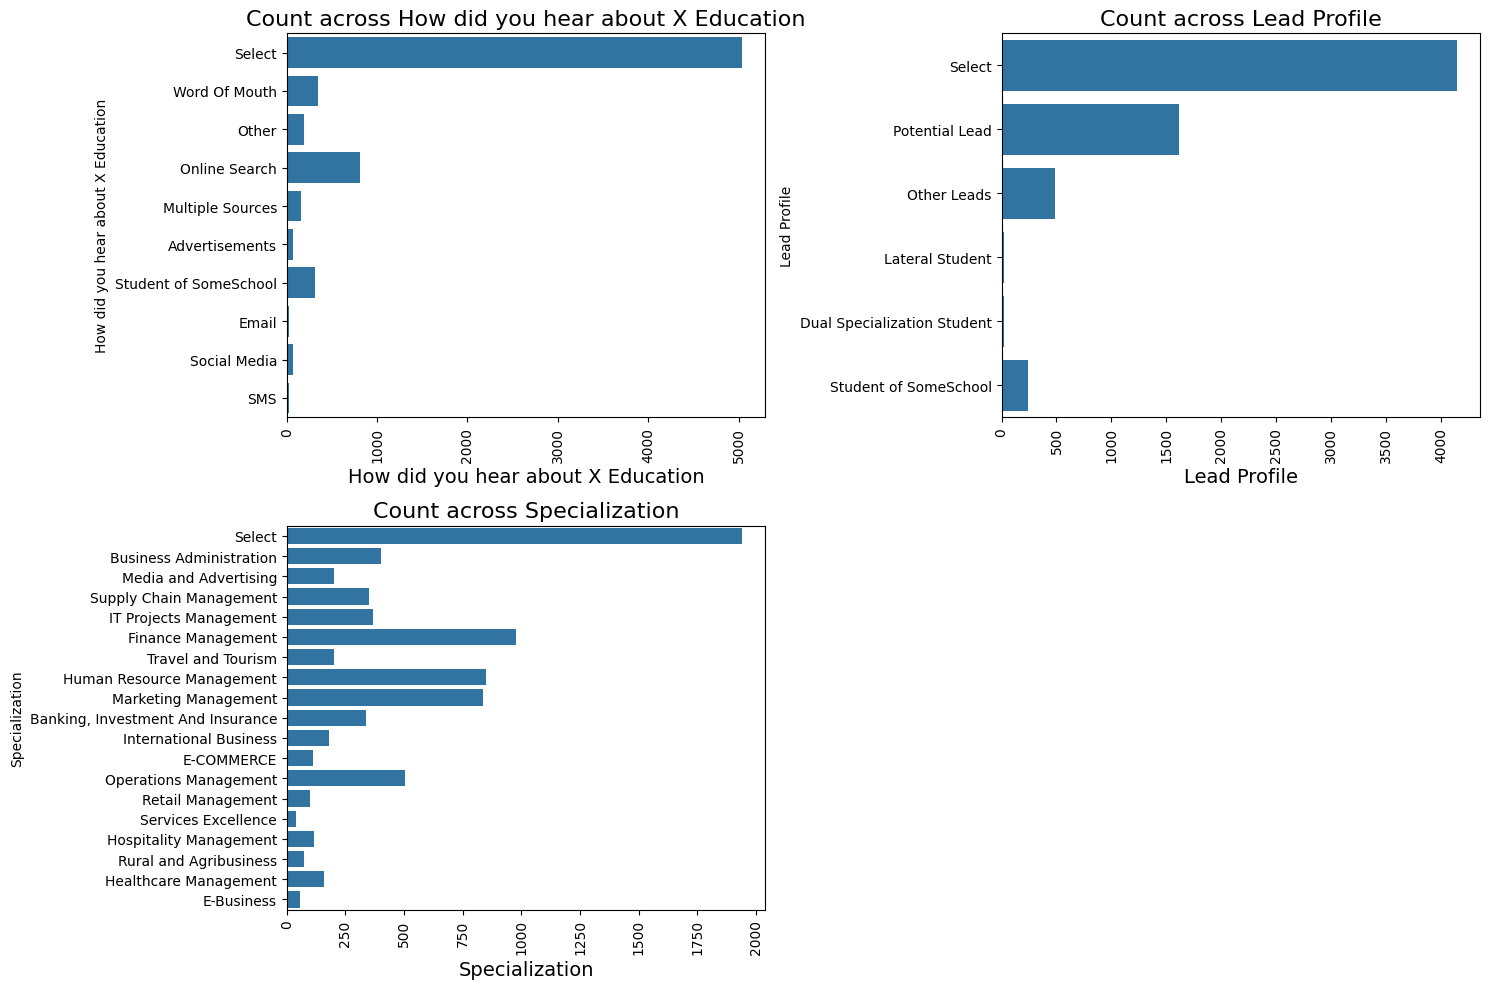

In [9]:
# Visual representation
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(lead_score_df[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)

plt.tight_layout()

we can observe `select` in few columns which are also null values because the person has not selected any option while filling the information so it was by default tooks the select.

Columns which have: City, Lead Profile, How did you hear about X Education, Specialization

### Step 2: Data Cleaning

In [10]:
# filling select with NaN values
lead_score_df.replace('Select', np.nan, inplace=True)

In [11]:
# lets first create an dummy df and replicate with lead_score_df
lead_score_df_clone = lead_score_df.copy()

# Check the number of missing values in each column
missing_percentage = (lead_score_df_clone.isnull().sum() / len(lead_score_df_clone)) * 100

# Display columns with missing values
print(missing_percentage[missing_percentage > 0])

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
City                                             39.707792
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

We can see there are nulls with high percentage in few columns so i want to remove the columns which are having more that 40% except for Lead Quality & Lead Profile as they may help for analysis

In [12]:
# Remove columns having null % for that 40% except for Lead Quality & Lead Profile as they may help for analysis
cols_to_drop = []
for column in lead_score_df_clone.columns:
    if lead_score_df_clone[column].isnull().sum() / len(lead_score_df_clone) * 100 > 40 and column not in ['Lead Quality', 'Lead Profile']:
        cols_to_drop.append(column)

lead_score_df_clone.drop(columns=cols_to_drop, inplace=True)

In [13]:
# Null values less than 5% should replaced with mean for float/int and mode for object dtypes columns
for column in lead_score_df_clone.columns:
  if lead_score_df_clone[column].isnull().sum() < len(lead_score_df_clone) * 0.05:
    if pd.api.types.is_numeric_dtype(lead_score_df_clone[column]):
      lead_score_df_clone[column].fillna(lead_score_df_clone[column].mean(), inplace=True)
    elif pd.api.types.is_object_dtype(lead_score_df_clone[column]):
      lead_score_df_clone[column].fillna(lead_score_df_clone[column].mode()[0], inplace=True)

In [14]:
# Check the null % again
print(lead_score_df_clone.shape)
print(lead_score_df_clone.isnull().sum()* 100 / len(lead_score_df_clone))

(9240, 32)
Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                     

we can observe that few columns are not necessary as they don't derive any insights/recommendation on lead also there is quite huge imbalance in data for few columns those will make the model insignificant. So lets remove.

- Prospect ID: No use of keeping ID for analysis
- Lead Number: No use of keeping ID for analysis
- Do Not Call: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- Do Not Email: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- Country: Not usually for analysis
- Search: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- Magazine: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- Newspaper Article: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- X Education Forums: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- Newspaper: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- Digital Advertisement: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- Through Recommendations: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- Receive More Updates About Our Courses: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- Update me on Supply Chain Content: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- Get updates on DM Content: `No` values are more which leads to data imbalance and model cannot predict patterns for other kind of values like `Yes`
- City: Not usually for analysis also the null % is close to 40%
- I agree to pay the amount through cheque: Not usually for analysis
- What matters most to you in choosing a course: It has the level `Better Career Prospects`: 6528 times while the other two levels appear with very less values
- Tags: Not usually for analysis



In [15]:
# removing columns based on above statements
cols_to_remove = ['Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course','Do Not Call', 'Do Not Email', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses','Prospect ID', 'Lead Number', 'Country', 'City', 'Tags']
lead_score_df_clone.drop(columns=cols_to_remove,axis=1, inplace=True)
lead_score_df_clone.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation      Lead Quality  \
0                      NaN                      Unemployed  Low in Relevance   
1                      NaN                      Unemployed               NaN   
2  Business Administration                         Student          Might be   
3    Media and Advertising                      Unemployed          Not Sure   
4                      NaN                      Unemployed          Might be   

     Lead Profile A free copy of Mastering The Interview Last Notable Activity  
0             NaN                                     No              Modified  
1             NaN                                     No          Email Opened  
2  Potential Lead                                    Yes          Email Opened  
3             NaN                                     No              Modified  
4             NaN                                     No              Modified

In [16]:
# Replace null values with 'Missing' for object type columns
for column in lead_score_df_clone.columns:
  if pd.api.types.is_object_dtype(lead_score_df_clone[column]):
    lead_score_df_clone[column].fillna('Missing', inplace=True)

In [17]:
# Making note of columns with missing values
columns_with_missing = []
for column in lead_score_df_clone.columns:
  if 'Missing' in lead_score_df_clone[column].unique():
    columns_with_missing.append(column)

print(columns_with_missing)

['Specialization', 'What is your current occupation', 'Lead Quality', 'Lead Profile']


In [18]:
# Check the null % again
print(lead_score_df_clone.shape)
print(lead_score_df_clone.isnull().sum()* 100 / len(lead_score_df_clone))

(9240, 13)
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Lead Quality                              0.0
Lead Profile                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


### Step 3: Visualizing the Data (EDA)

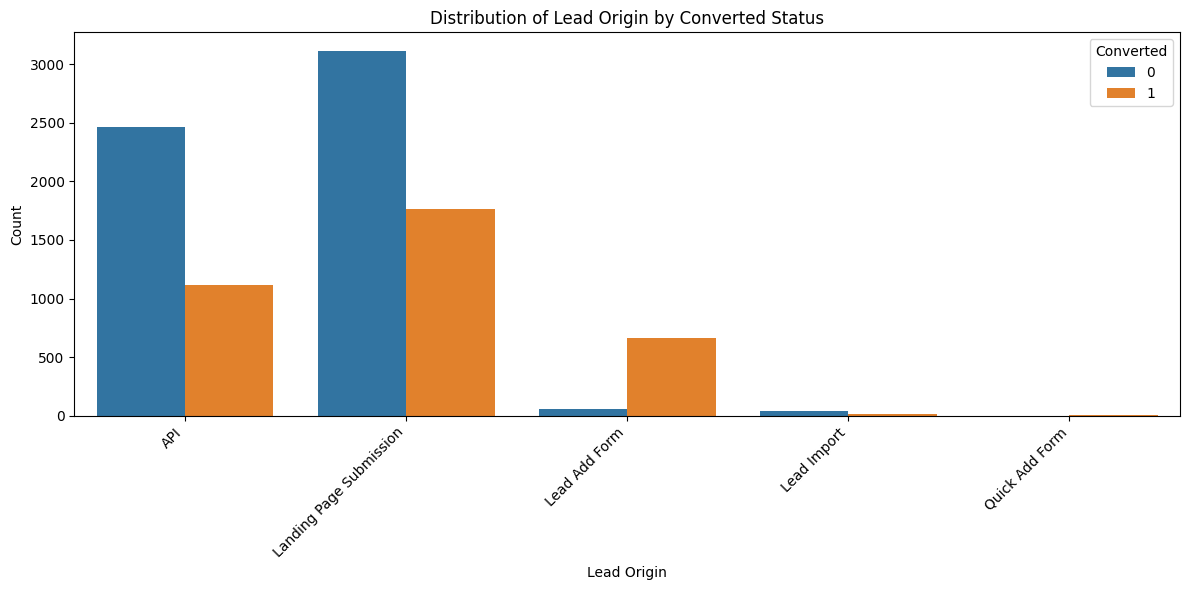

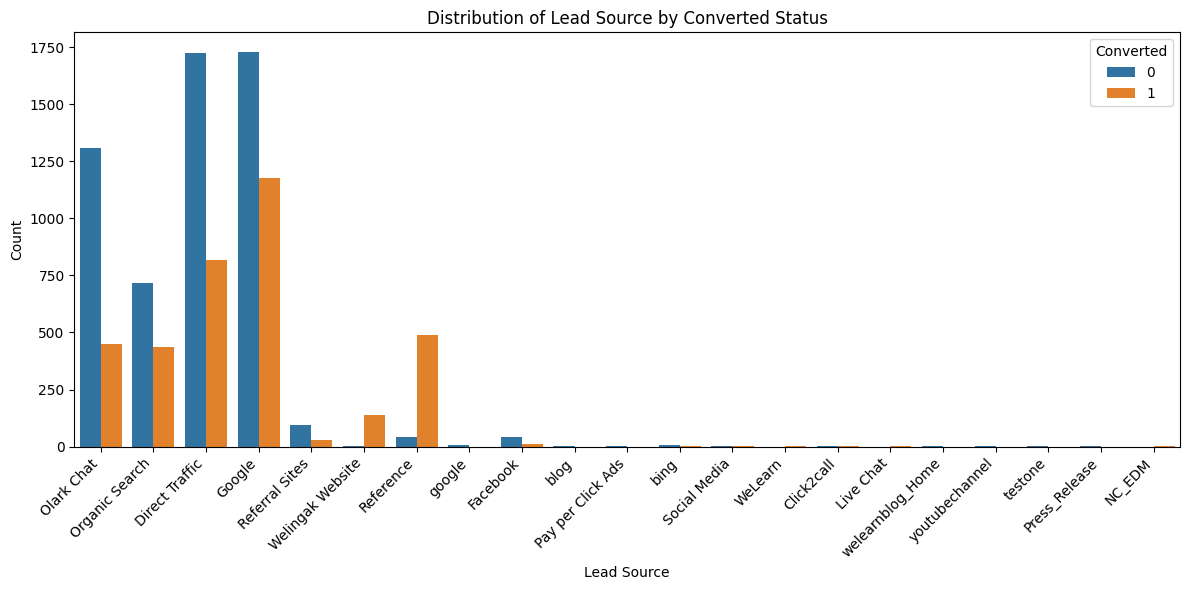

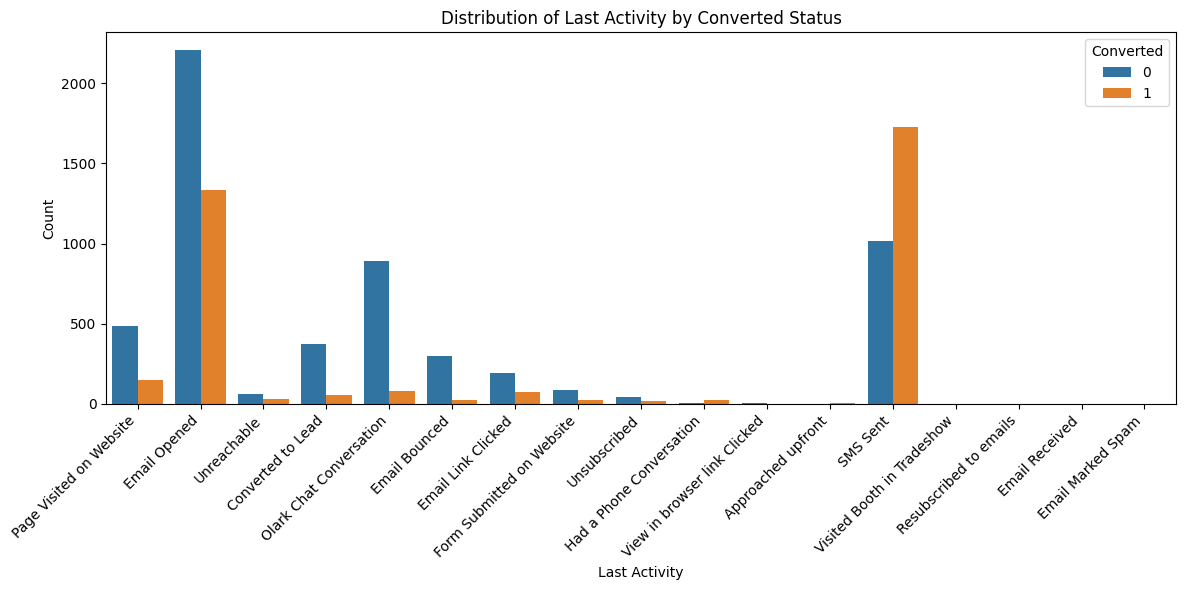

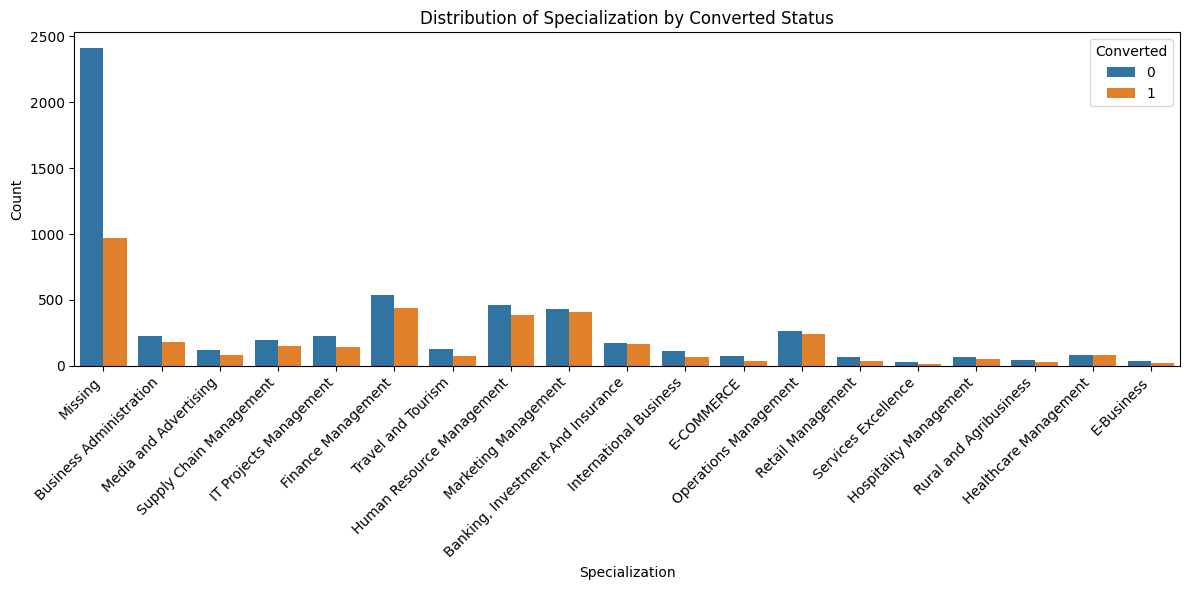

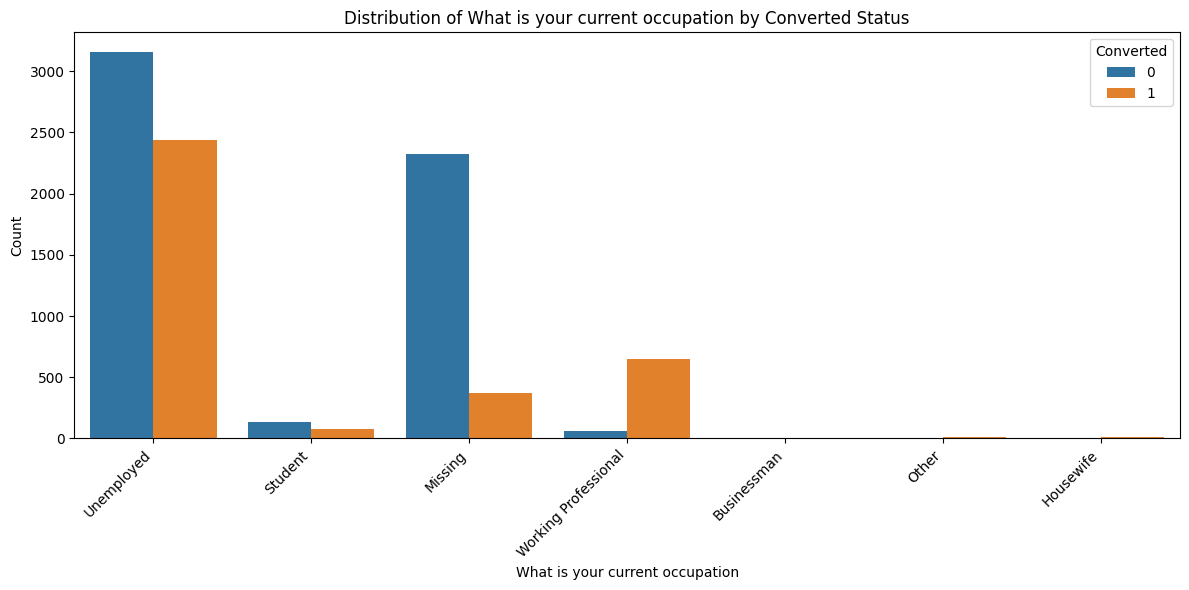

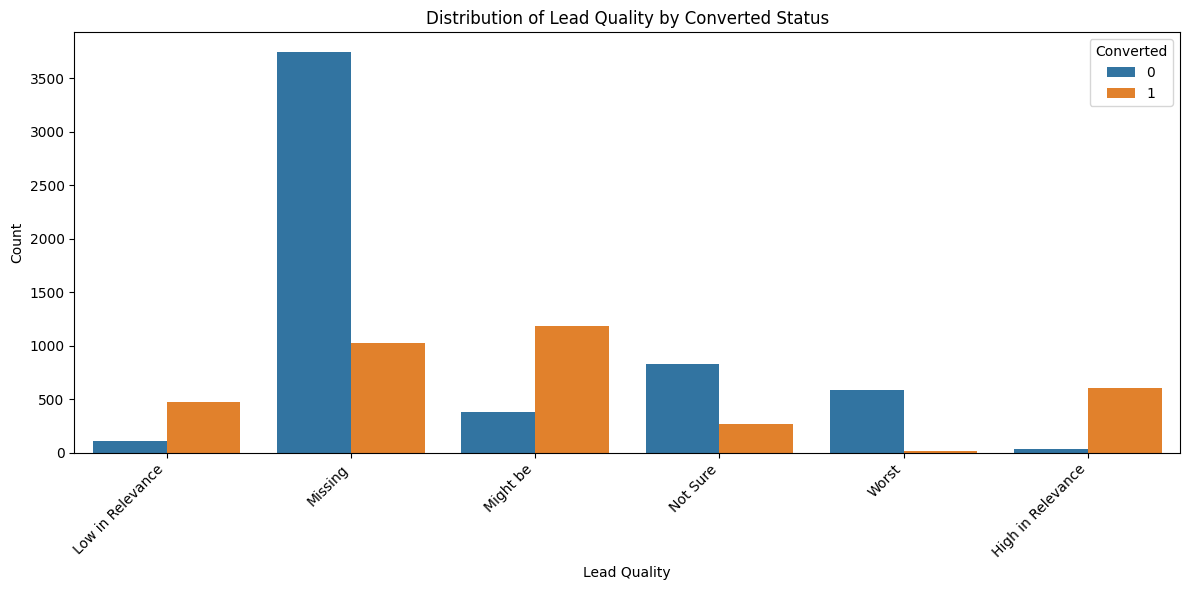

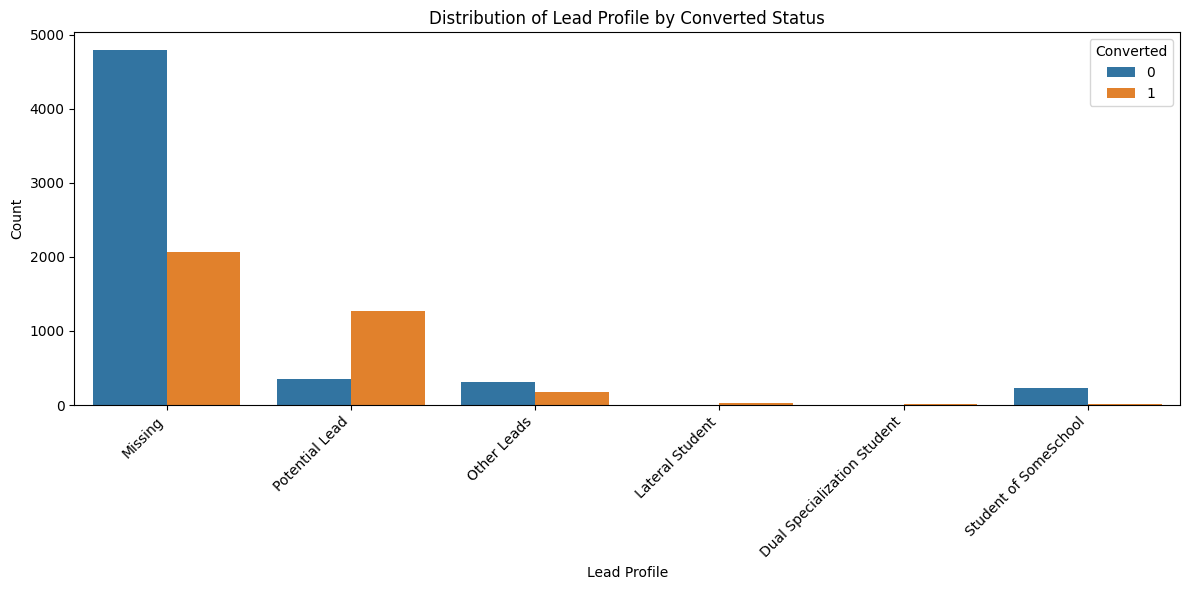

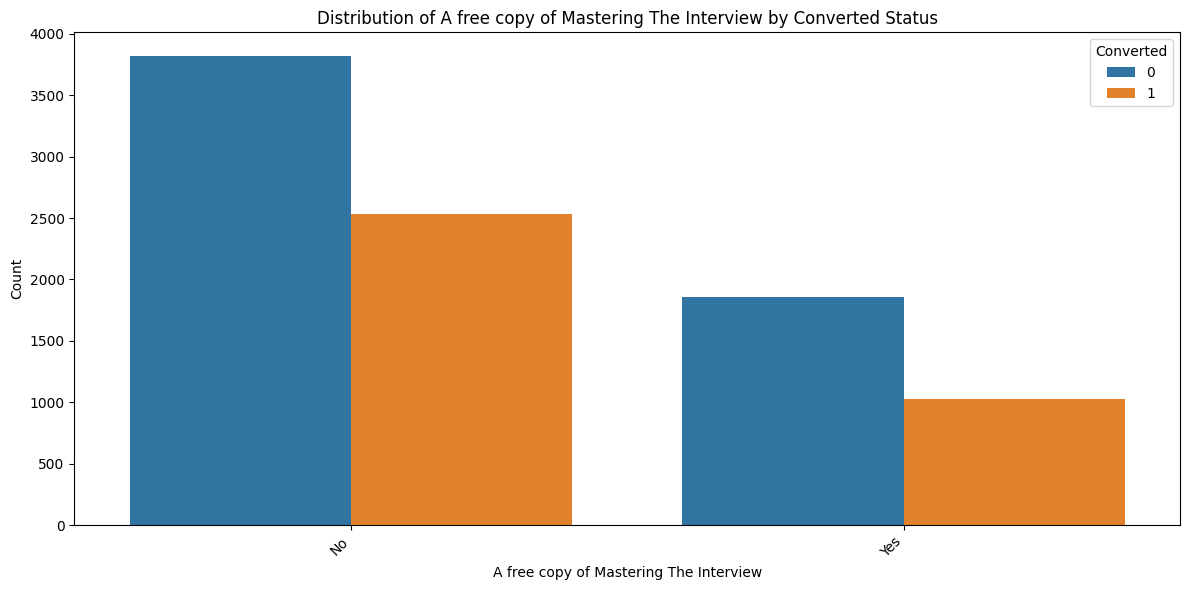

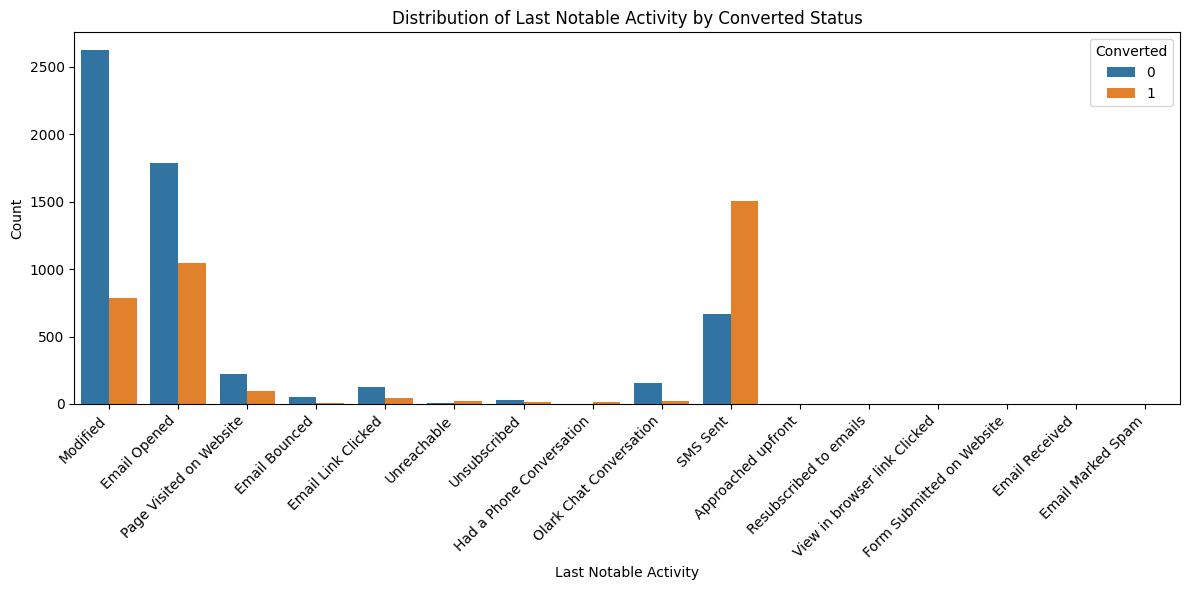

In [19]:
# Loop through categorical columns and create countplots for each with target variable
for column in lead_score_df_clone.select_dtypes(include=['object']).columns:
    if column != 'Converted':  # Exclude the target variable itself
        plt.figure(figsize=(12, 6))  # Set a decent figure size
        sns.countplot(x=column, hue='Converted', data=lead_score_df_clone)
        plt.title(f'Distribution of {column} by Converted Status')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.legend(title='Converted')
        plt.tight_layout()  # Adjust layout for better spacing
        plt.show()

Findings & Suggestions:
- Lead Origin:

 - Observation: API and landing page leads convert better than Lead Add Form leads.
 - Action: Improve API and landing page experiences to attract high-quality leads.

- Lead Source:

 - Observation: Google leads convert best; Direct traffic and Olark chat leads are also effective.
 - Action: Boost marketing on Google, optimize for direct traffic, and enhance Olark chat engagement.

- Last Activity:

 - Observation: Email Opened and SMS Sent have higher conversion rates.
 - Action: Focus on email and SMS campaigns for better engagement and conversions.

- What is the current occupation:

 - Observation: Unemployed leads have a higher conversion rate, indicating they are more receptive to educational opportunities.
 - Action: Target marketing campaigns towards unemployed individuals to capitalize on their interest in pursuing new education.


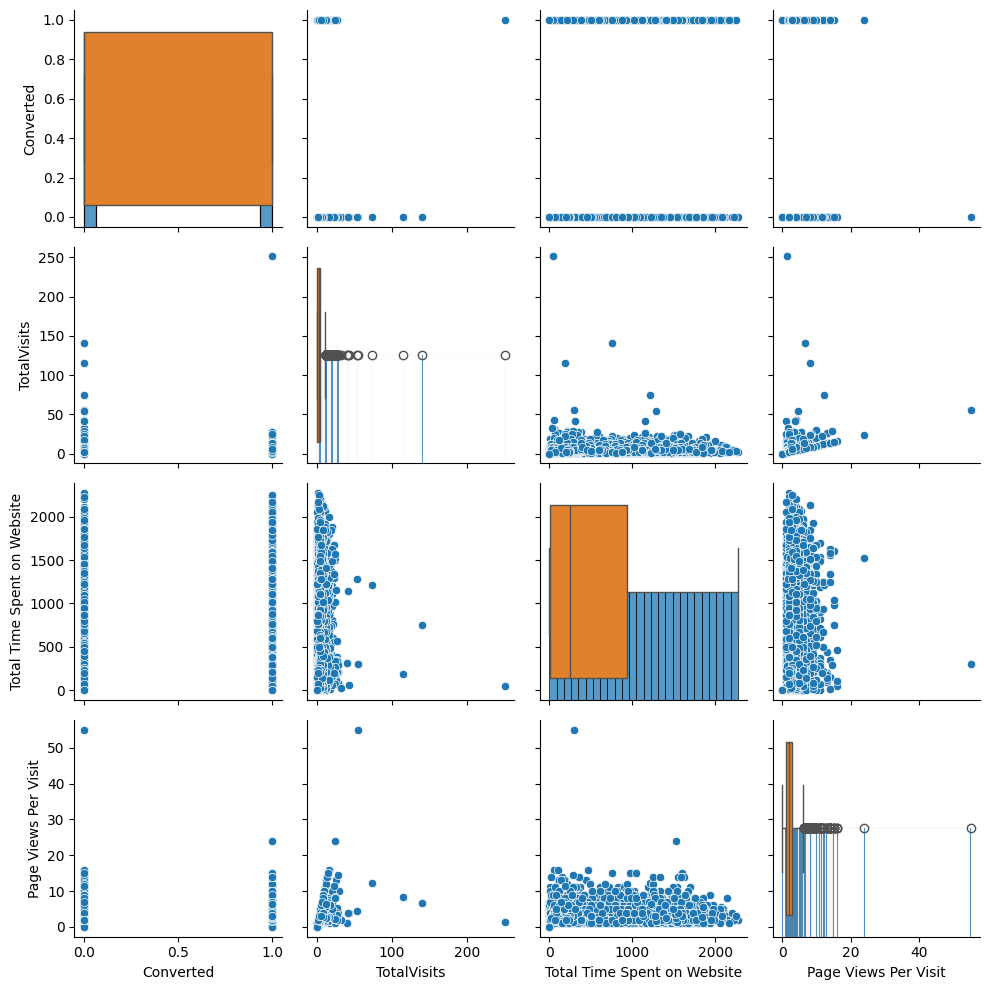

In [20]:
# creating the list of numerical variables and visualizing

# Select only the numerical columns from the DataFrame
num_var_columns = lead_score_df_clone.select_dtypes(include='number').columns

# Create the pairplot with default histograms on the diagonal
pairplot = sns.pairplot(data=lead_score_df_clone, vars=num_var_columns, diag_kind='hist')

# Iterate through the axes in the pairplot to replace the diagonals with box plots
for i, ax in enumerate(pairplot.diag_axes):
    # Plot a box plot on the diagonal
    sns.boxplot(x=lead_score_df_clone[num_var_columns[i]], ax=ax)
    ax.set_xlabel('')  # Optional: Remove x-axis label
    ax.set_ylabel('')  # Optional: Remove y-axis label

# Adjust layout to make sure everything fits well
plt.tight_layout()
plt.show()


FIndings:

1. TotalVisits:
Most leads have a low number of total visits, with a few outliers having significantly higher visits.

2. Total Time Spent on Website:
There's a clear positive correlation between total time spent on the website and conversion. Leads spending more time on the website are more likely to convert.

3. Page Views Per Visit:
Similar to total visits, most leads have a low number of page views per visit, with a few outliers having significantly higher page views.

The data points in few columns are distributed in good manner with no outliers and in few columns i can see outliers are there for which i will be handling it though scaling

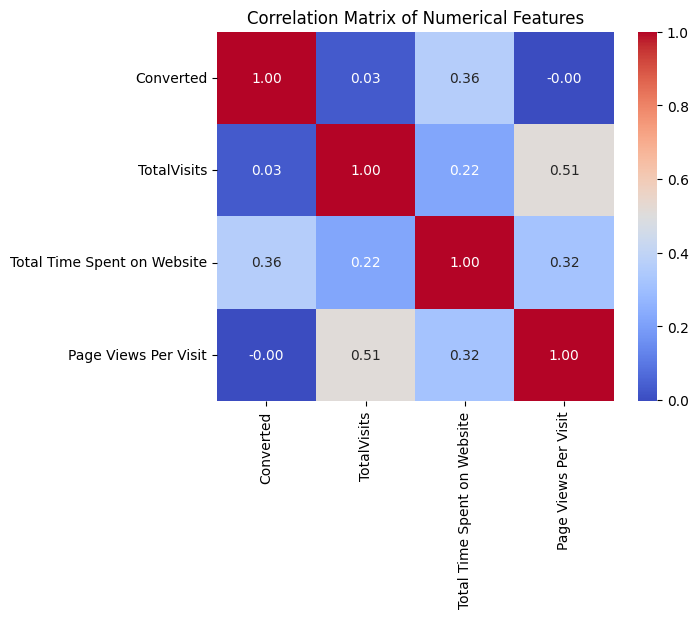

In [21]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = lead_score_df_clone.select_dtypes(include=np.number).corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

We can observe the relationship between 'TotalVisits' and 'Page Views Per Visit' which is excepted to have correlation as they are interlinked with each other.

### Step 4: Data Preparation

In [22]:
# changing the columns which are having yes or no values to 1 or 0
lead_score_df_clone['A free copy of Mastering The Interview']=lead_score_df_clone['A free copy of Mastering The Interview'].replace({'Yes':1, 'No':0})

In [23]:
# Creating dummy variables for categorical columns (excluding those with 'Missing')
dummy_df = pd.get_dummies(lead_score_df_clone,
                         columns=[col for col in lead_score_df_clone.select_dtypes(include=['object']).columns if col not in columns_with_missing],
                         drop_first=True,dtype=int)

print(dummy_df.head())


   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

            Specialization What is your current occupation      Lead Quality  \
0                  Missing                      Unemployed  Low in Relevance   
1                  Missing                      Unemployed           Missing   
2  Business Administration                         Student          Might be   
3    Media and Advertising                      Unemployed          Not Sure   
4                  Missing                      Unemployed          Might be   

     Lead Profile  A free copy of Mast

In [24]:
# Create dummy variables for columns_with_missing
for column in columns_with_missing:
  dummy_df = pd.get_dummies(dummy_df, columns=[column], prefix=column, drop_first=False, dtype=int)

# Drop columns with 'Missing' in their name
lead_score_with_dummies = dummy_df[[col for col in dummy_df.columns if 'Missing' not in col]]

Since missing is nothing but NaN & select values which are not useful for analysis i am  dropping those

In [25]:
# checking the new df
lead_score_with_dummies.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0  

In [26]:
# checking the shape of new df
lead_score_with_dummies.shape

(9240, 94)

In [27]:
# checking the info of new df
lead_score_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   A free copy of Mastering The Interview                9240 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9240 non-null   int64  
 6   Lead Origin_Lead Add Form                             9240 non-null   int64  
 7   Lead Origin_Lead Import                               9240 non-null   int64  
 8   Lead Origin_Quick Add Form                            9240

### Step 5: Splitting the Data into Training and Testing Sets

In [28]:
# importing train_test_split for splitting data into train and test data
from sklearn.model_selection import train_test_split

# We specify random so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(lead_score_with_dummies, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
# Rescaling the Features/variables with Min-Max method.

# importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scaling the continues variables
df_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(df_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [30]:
# checking the shape
print(df_train.shape)

(6468, 94)


In [31]:
# Inspect train data set
df_train.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  6468.000000  6468.000000                  6468.000000   
mean      0.381262     0.013843                     0.212974   
std       0.485734     0.021047                     0.240566   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.003984                     0.005282   
50%       0.000000     0.011952                     0.108275   
75%       1.000000     0.019920                     0.407790   
max       1.000000     1.000000                     1.000000   

       Page Views Per Visit  A free copy of Mastering The Interview  \
count           6468.000000                             6468.000000   
mean               0.042787                                0.311843   
std                0.039318                                0.463282   
min                0.000000                                0.000000   
25%                0.018182                                0.000000   
50%                0.036364                                0.000000   
75%                0.054545                                1.000000   
max                1.000000                                1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          6468.000000                6468.000000   
mean                              0.528139                   0.079468   
std                               0.499246                   0.270489   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
count              6468.000000                 6468.000000   
mean                  0.005102                    0.000155   
std                   0.071252                    0.012434   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                   1.000000                    1.000000   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 6468.000000           6468.000000         6468.000000   
mean                     0.271490              0.005102            0.320037   
std                      0.444763              0.071252            0.466527   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      1.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
count            6468.000000         6468.000000             6468.000000   
mean                0.000309            0.000155                0.190167   
std                 0.017583            0.012434                0.392463   
min                 0.000000            0.000000                0.000000   
25%                 0.000000            0.000000                0.000000   
50%                 0.000000            0.000000                0.000000   
75%                 0.000000            0.000000                0.000000   
max                 1.000000            1.000000                1.000000   

       Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
count                 6468.000000                    6468.000000   
mean                     0.121058         

In [32]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('Converted')
X_train = df_train

In [33]:
# checking the shape
print(X_train.shape)
print(y_train.shape)

(6468, 93)
(6468,)


### Step 6: Building LogisticRegression model by combination of Automated(RFE) and Manual method

#### Using RFE method for features selections
This method was considered because it helps in selecting the top features among the n number of feature. Here i would like to consider top20 features

In [34]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [35]:
# Import RFE and select 20 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [36]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 65),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 68),
 ('Lead Origin_Quick Add Form', False, 20),
 ('Lead Source_Direct Traffic', False, 36),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Live Chat', False, 25),
 ('Lead Source_NC_EDM', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Pay per Click Ads', False, 50),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Social Media', False, 23),
 ('Lead Source_WeLearn', False, 57),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 24),
 ('Lead Source_blog', False, 48),
 ('Lead Source_google

In [37]:
# listing the top 20 features which are selected thought RFE
top20 = X_train.columns[rfe.support_]
print(top20)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable',
       'Specialization_Hospitality Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Quality_High in Relevance', 'Lead Quality_Low in Relevance',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Lead Profile_Dual Specialization Student'],
      dtype='object')


In [38]:
# dataframe with RFE selected features
X_train_rfe = X_train[top20]

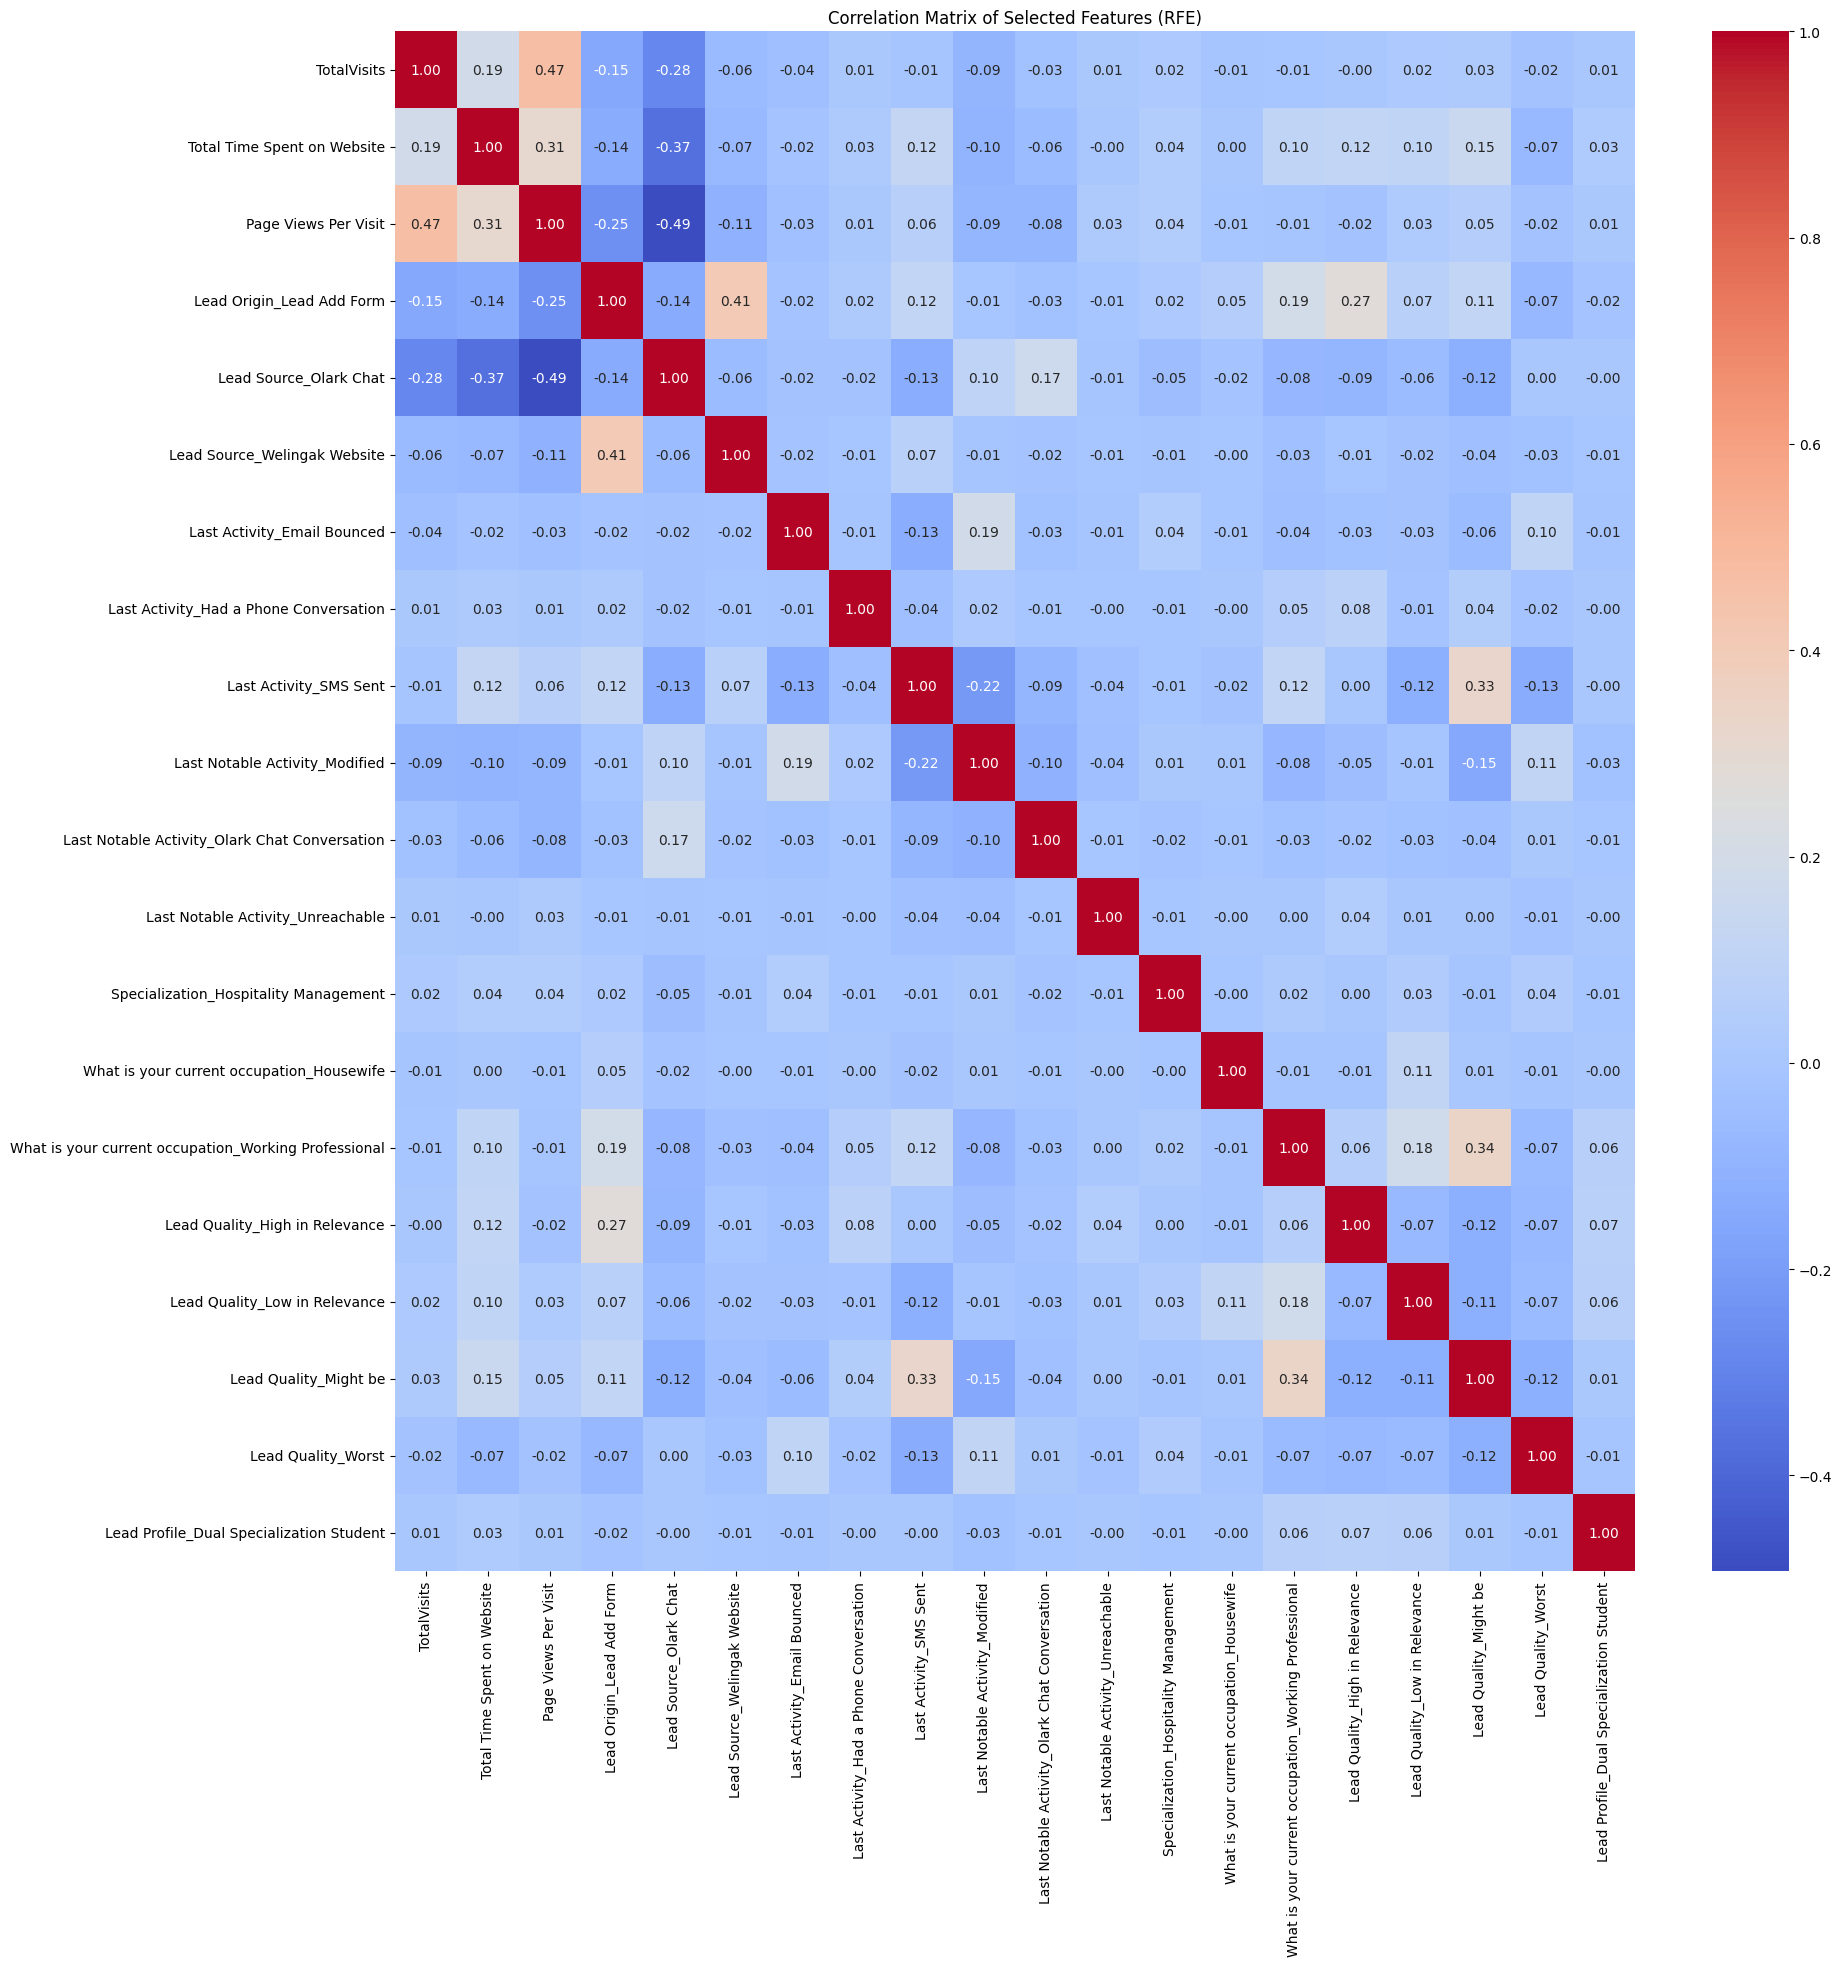

In [39]:
# Calculate the correlation matrix for the selected features
correlation_matrix = X_train_rfe.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features (RFE)')
plt.show()


Findings:

- Strong Positive Correlation:

 - Insight: Features move together (e.g., “TotalVisits” and “Page Views Per Visit”).
 - Action: Enhance website engagement and content quality to boost lead conversion.

- Strong Negative Correlation:

 - Insight: Features move inversely (e.g., “Lead Origin_Lead Add Form” vs. “Lead Source_Olark Chat”).
 - Action: Optimize effective lead generation channels and allocate resources accordingly.

- No Correlation:

 - Insight: Features are not significantly related (e.g., “Lead Source_Direct Traffic” vs. “TotalVisits”).
 - Action: Focus on improving website user experience and content rather than traffic sources.

- Multicollinearity:

 - Insight: High correlation between features (e.g., “TotalVisits” and “Page Views Per Visit”).
 - Action: Remove or combine redundant features to improve model stability and performance.

#### Building model using statsmodel, for the detailed statistics.

In [40]:
# importing stats and other required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# creating function for stats model building
def stat_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    logm = sm.GLM(y, X, family = sm.families.Binomial())
    res = logm.fit() # fitting the model
    print(res.summary()) # model summary
    return res

In [42]:
# creating function for VIF check
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Manual elimination
Keeping variables which are considerable significance level less than 0.05 (p-value)

In [43]:
# Model 1 (Building with all RFE features)
Model_1 = stat_model(X_train_rfe,y_train)
checkVIF(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2210.7
Date:                Tue, 17 Sep 2024   Deviance:                       4421.4
Time:                        13:26:27   Pearson chi2:                 6.65e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4757
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Features   VIF
2                                Page Views Per Visit  2.79
1                         Total Time Spent on Website  2.09
0                                         TotalVisits  1.84
3                           Lead Origin_Lead Add Form  1.71
17                              Lead Quality_Might be  1.68
8                              Last Activity_SMS Sent  1.64
9                      Last Notable Activity_Modified  1.56
14  What is your current occupation_Working Profes...  1.36
15                     Lead Quality_High in Relevance  1.33
4                              Lead Source_Olark Chat  1.28
5                        Lead Source_Welingak Website  1.28
16                      Lead Quality_Low in Relevance  1.23
6                         Last Activity_Email Bounced  1.09
18                                 Lead Quality_Worst  1.09
10      Last Notable Activity_Olark Chat Conversation  1.07
13          What is your current occupation_Housewife  1.02
12              Specialization_Hospitality Management  1.02
7              Last Activity_Had a Phone Conversation  1.02
19           Lead Profile_Dual Specialization Student  1.02
11                  Last Notable Activity_Unreachable  1.01

As we can observe "Lead Profile_Dual Specialization Student" is having hight p-value so lets remove it

In [44]:
# Dropping 'Lead Profile_Dual Specialization Student'
X_train_rfe_new = X_train_rfe.drop('Lead Profile_Dual Specialization Student',axis=1)

In [45]:
# Model 2 after dropping 'Lead Profile_Dual Specialization Student'
Model_2 = stat_model(X_train_rfe_new,y_train)
checkVIF(X_train_rfe_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2212.8
Date:                Tue, 17 Sep 2024   Deviance:                       4425.6
Time:                        13:26:27   Pearson chi2:                 6.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4754
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Features   VIF
2                                Page Views Per Visit  2.79
1                         Total Time Spent on Website  2.09
0                                         TotalVisits  1.84
3                           Lead Origin_Lead Add Form  1.71
17                              Lead Quality_Might be  1.68
8                              Last Activity_SMS Sent  1.64
9                      Last Notable Activity_Modified  1.56
14  What is your current occupation_Working Profes...  1.35
15                     Lead Quality_High in Relevance  1.33
5                        Lead Source_Welingak Website  1.28
4                              Lead Source_Olark Chat  1.28
16                      Lead Quality_Low in Relevance  1.23
6                         Last Activity_Email Bounced  1.09
18                                 Lead Quality_Worst  1.09
10      Last Notable Activity_Olark Chat Conversation  1.07
7              Last Activity_Had a Phone Conversation  1.02
12              Specialization_Hospitality Management  1.02
13          What is your current occupation_Housewife  1.02
11                  Last Notable Activity_Unreachable  1.01

As we can observe 'What is your current occupation_Housewife' is having hight p-value so lets remove it

In [46]:
# Dropping 'What is your current occupation_Housewife'
X_train_rfe_new = X_train_rfe_new.drop('What is your current occupation_Housewife',axis=1)

In [47]:
# Model 3 after dropping 'What is your current occupation_Housewife'
Model_3 = stat_model(X_train_rfe_new,y_train)
checkVIF(X_train_rfe_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2215.7
Date:                Tue, 17 Sep 2024   Deviance:                       4431.4
Time:                        13:26:28   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4749
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Features   VIF
2                                Page Views Per Visit  2.79
1                         Total Time Spent on Website  2.09
0                                         TotalVisits  1.84
3                           Lead Origin_Lead Add Form  1.70
16                              Lead Quality_Might be  1.67
8                              Last Activity_SMS Sent  1.64
9                      Last Notable Activity_Modified  1.56
13  What is your current occupation_Working Profes...  1.35
14                     Lead Quality_High in Relevance  1.32
5                        Lead Source_Welingak Website  1.28
4                              Lead Source_Olark Chat  1.28
15                      Lead Quality_Low in Relevance  1.21
6                         Last Activity_Email Bounced  1.09
17                                 Lead Quality_Worst  1.09
10      Last Notable Activity_Olark Chat Conversation  1.07
7              Last Activity_Had a Phone Conversation  1.02
12              Specialization_Hospitality Management  1.02
11                  Last Notable Activity_Unreachable  1.01

As we can observe 'Last Activity_Had a Phone Conversation' is having hight p-value so lets remove it

In [48]:
# Dropping 'Last Activity_Had a Phone Conversation'
X_train_rfe_new = X_train_rfe_new.drop('Last Activity_Had a Phone Conversation',axis=1)

In [49]:
# Model 4 after dropping 'Last Activity_Had a Phone Conversation'
Model_4 = stat_model(X_train_rfe_new,y_train)
checkVIF(X_train_rfe_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2217.4
Date:                Tue, 17 Sep 2024   Deviance:                       4434.7
Time:                        13:26:28   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4747
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Features   VIF
2                                Page Views Per Visit  2.79
1                         Total Time Spent on Website  2.09
0                                         TotalVisits  1.84
3                           Lead Origin_Lead Add Form  1.70
15                              Lead Quality_Might be  1.67
7                              Last Activity_SMS Sent  1.64
8                      Last Notable Activity_Modified  1.56
12  What is your current occupation_Working Profes...  1.35
13                     Lead Quality_High in Relevance  1.32
5                        Lead Source_Welingak Website  1.28
4                              Lead Source_Olark Chat  1.28
14                      Lead Quality_Low in Relevance  1.21
6                         Last Activity_Email Bounced  1.09
16                                 Lead Quality_Worst  1.09
9       Last Notable Activity_Olark Chat Conversation  1.07
11              Specialization_Hospitality Management  1.02
10                  Last Notable Activity_Unreachable  1.01

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [50]:
# Checking the parameters and their coefficient values
Model_4.params

const                                                  -2.711079
TotalVisits                                             5.254243
Total Time Spent on Website                             4.449130
Page Views Per Visit                                   -4.377410
Lead Origin_Lead Add Form                               2.420011
Lead Source_Olark Chat                                  1.212110
Lead Source_Welingak Website                            3.534517
Last Activity_Email Bounced                            -1.154502
Last Activity_SMS Sent                                  1.291043
Last Notable Activity_Modified                         -0.932393
Last Notable Activity_Olark Chat Conversation          -1.184090
Last Notable Activity_Unreachable                       1.317698
Specialization_Hospitality Management                  -1.001146
What is your current occupation_Working Professional    1.785486
Lead Quality_High in Relevance                          3.803360
Lead Quality_Low in Relevance                           2.906829
Lead Quality_Might be                                   1.667952
Lead Quality_Worst                                     -1.929615
dtype: float64

### Step 7: Model Evaluation

In [51]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = Model_4.predict(sm.add_constant(X_train_rfe_new))
y_train_pred

1871    0.182579
6795    0.144361
3516    0.200095
8105    0.913984
3934    0.080812
4844    0.992603
3297    0.064365
8071    0.992734
987     0.108500
7423    0.962747
1032    0.715964
6542    0.566591
4317    0.275192
6472    0.888096
712     0.032095
3960    0.182579
4654    0.182579
5902    0.008458
4691    0.182579
4341    0.690214
3677    0.425507
1050    0.957201
9115    0.963969
2878    0.995733
6167    0.989382
9031    0.992175
2175    0.069546
3147    0.956901
8886    0.860518
7944    0.185653
3278    0.660575
7615    0.073198
7455    0.703012
7379    0.112382
2712    0.326157
499     0.012605
8329    0.182579
504     0.158728
3610    0.797703
3975    0.210821
1835    0.011178
1756    0.431741
3059    0.095796
7257    0.160029
498     0.074415
6920    0.402684
4393    0.182579
6970    0.138945
6929    0.049851
4779    0.995022
6195    0.003887
5145    0.867318
5933    0.996259
9093    0.945905
4498    0.817000
4611    0.031414
2196    0.947187
1599    0.420113
9032    0.541419
5054    0.072700
8557    0.080812
6128    0.082023
3270    0.927903
5940    0.009262
6859    0.080126
2278    0.080812
4858    0.938850
2714    0.936118
561     0.664872
936     0.951167
3895    0.122921
8764    0.589131
4928    0.448205
8698    0.056831
7783    0.306697
4953    0.095168
2440    0.981231
543     0.286037
455     0.060527
5074    0.710527
6949    0.107474
7038    0.751467
3880    0.080812
6220    0.045946
1412    0.215651
6413    0.174973
8203    0.147331
8804    0.768542
4776    0.988495
4686    0.744064
8338    0.156230
7077    0.108561
6566    0.006856
300     0.080812
7843    0.243304
8132    0.024081
8542    0.005937
8652    0.080812
6998    0.080812
3146    0.971036
1904    0.054897
1510    0.886509
2837    0.903055
5041    0.030705
3109    0.023342
6294    0.448205
294     0.014651
4165    0.347800
1011    0.069140
6588    0.035248
3363    0.091313
5815    0.979753
7465    0.074160
7233    0.016365
7341    0.080812
5758    0.009672
42      0.068200
238     0.503079
7309    0.023134
7400    0.353968
2268    0.935990
9117    0.031414
8169    0.209227
6521    0.170496
6373    0.811537
7960    0.862819
2190    0.001855
813     0.182579
9206    0.553063
6412    0.893791
3817    0.978466
358     0.938518
8000    0.014144
973     0.937647
5058    0.197531
5428    0.182579
8102    0.080812
1228    0.080812
7644    0.701336
5275    0.785860
6786    0.158606
5831    0.182579
1197    0.405134
1374    0.582813
2110    0.903063
7656    0.253001
8293    0.980372
5098    0.063980
9121    0.272670
7524    0.122914
3821    0.060569
403     0.414513
4652    0.353238
4918    0.202162
6321    0.827326
3170    0.448205
1253    0.027730
2419    0.024132
6221    0.221208
2182    0.075933
4727    0.053985
2130    0.983316
8270    0.325747
1553    0.966963
7861    0.570411
1184    0.119236
6743    0.935448
1673    0.005383
8070    0.988495
3441    0.909240
3589    0.977152
1493    0.090044
326     0.029289
1136    0.404556
265     0.063980
3900    0.380298
2139    0.078496
7479    0.121825
3462    0.697570
8345    0.080812
8885    0.250702
3149    0.257772
2827    0.566524
4663    0.713227
3214    0.014962
4718    0.066352
1187    0.038564
5072    0.182579
7595    0.351075
5061    0.942207
8389    0.506935
5525    0.972629
5118    0.173475
5624    0.060104
7679    0.182579
4822    0.919703
3881    0.892065
2342    0.850119
1750    0.734541
1089    0.789818
247     0.151030
1450    0.989333
1952    0.049390
2908    0.018314
1746    0.516889
1893    0.083528
4123    0.999113
7762    0.042754
1301    0.025769
9138    0.905291
6952    0.126561
7173    0.448205
7532    0.315310
6603    0.180423
5804    0.988495
5486    0.182579
6839    0.591184
5931    0.711909
852     0.063980
4190    0.042747
4958    0.109321
1147    0.080812
933     0.743925
1403    0.684592
104     0.168725
5375    0.014383
5341    0.132134
3285    0.986372
647     0.352488
1626    0.050981
2100    0.080812
9224    0.048012
181     0.080812
2065    0.931869
4347    0.944981
6702 

In [52]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.18257933, 0.14436058, 0.20009476, ..., 0.18257933, 0.16427343,
       0.08081226])

In [53]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Actual':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Actual  Conversion_Prob
0       0         0.182579
1       0         0.144361
2       0         0.200095
3       0         0.913984
4       0         0.080812

In [54]:
# Creating new column 'Predicted' with 1 if conversion_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Actual  Conversion_Prob  Predicted
0       0         0.182579          0
1       0         0.144361          0
2       0         0.200095          0
3       0         0.913984          1
4       0         0.080812          0

Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [55]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [56]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.Predicted )
print(confusion)

[[3626  376]
 [ 603 1863]]


In [57]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.Predicted))

0.8486394557823129


In [58]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
print('TP: ',TP)
TN = confusion[0,0] # true negatives
print('TN: ',TN)
FP = confusion[0,1] # false positives
print('FP: ',FP)
FN = confusion[1,0] # false negatives
print('FN: ',FN)

TP:  1863
TN:  3626
FP:  376
FN:  603


In [59]:
# Calculate the sensitivity & specificity

print('sensitivity:',TP/(TP+FN))
print('specificity:',TN/(TN+FP))

sensitivity: 0.7554744525547445
specificity: 0.9060469765117442


#### Finding the Optimal Cutoff:
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [60]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [61]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Actual, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

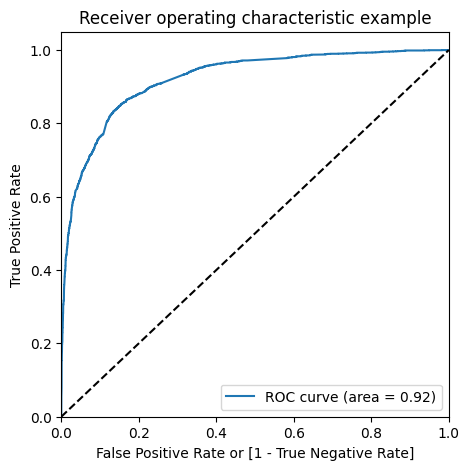

In [62]:
# plotting ROC
draw_roc(y_train_pred_final.Actual, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.92 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [63]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Actual  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       0         0.182579          0    1    1    0    0    0    0    0    0   
1       0         0.144361          0    1    1    0    0    0    0    0    0   
2       0         0.200095          0    1    1    1    0    0    0    0    0   
3       0         0.913984          1    1    1    1    1    1    1    1    1   
4       0         0.080812          0    1    0    0    0    0    0    0    0   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    1    1  
4    0    0

In [64]:
# Create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    c_m = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final[i] )
    total_=sum(sum(c_m))
    accuracy = (c_m[0,0]+c_m[1,1])/total_

    speci = c_m[0,0]/(c_m[0,0]+c_m[0,1])

    sensi = c_m[1,1]/(c_m[1,0]+c_m[1,1])

    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.726809  0.963909  0.580710
0.2   0.2  0.813080  0.903893  0.757121
0.3   0.3  0.843383  0.860908  0.832584
0.4   0.4  0.853123  0.823195  0.871564
0.5   0.5  0.848639  0.755474  0.906047
0.6   0.6  0.842919  0.702758  0.929285
0.7   0.7  0.833797  0.638281  0.954273
0.8   0.8  0.817563  0.564882  0.973263
0.9   0.9  0.777675  0.436740  0.987756


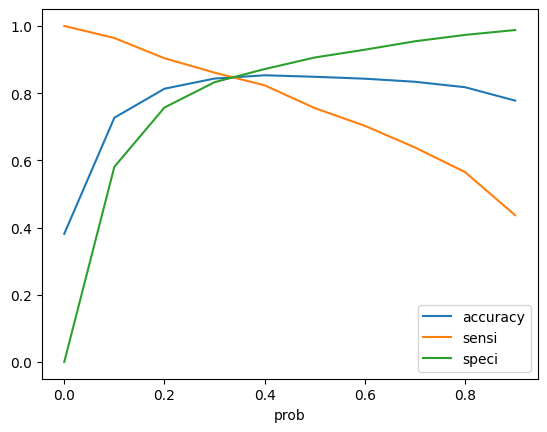

In [65]:
# Let's plot for cutoff value

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Based on the above plot i would like to consider the cutoff value to 0.4

In [66]:
# Adding the final pred column based on the above cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

Actual  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       0         0.182579          0    1    1    0    0    0    0    0    0   
1       0         0.144361          0    1    1    0    0    0    0    0    0   
2       0         0.200095          0    1    1    1    0    0    0    0    0   
3       0         0.913984          1    1    1    1    1    1    1    1    1   
4       0         0.080812          0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_predicted  
0    0    0                0  
1    0    0                0  
2    0    0                0  
3    1    1                1  
4    0    0                0

In [67]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.final_predicted)

0.8531230674087817

In [68]:
# Let's create the confusion matrix once again

confusion_optimal = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.final_predicted )
confusion_optimal

array([[3488,  514],
       [ 436, 2030]])

In [69]:
# Let's evaluate the other metrics as well

TP = confusion_optimal[1,1] # true positive
TN = confusion_optimal[0,0] # true negatives
FP = confusion_optimal[0,1] # false positives
FN = confusion_optimal[1,0] # false negatives

In [70]:
# Calculate the sensitivity & specificity

print('sensitivity:',TP/(TP+FN))
print('specificity:',TN/(TN+FP))

sensitivity: 0.8231954582319546
specificity: 0.8715642178910544


This cutoff point seems good

#### Precision-Recall View

Let's now build the training model using the precision-recall point of view

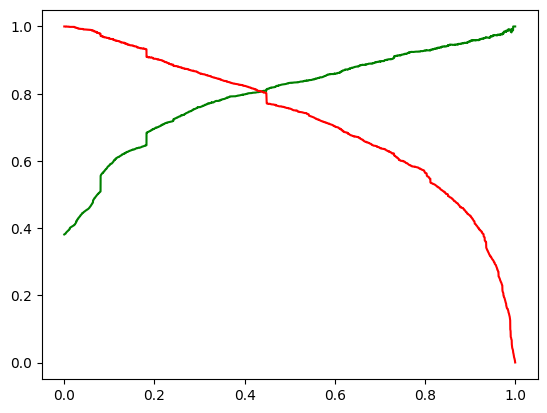

In [71]:
# precision_recall_curve
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Based on above plot i would like to consider the cutoff value to 0.44

In [72]:
# Changing the final_predicted column based on the cutoff of 0.44
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

Actual  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       0         0.182579          0    1    1    0    0    0    0    0    0   
1       0         0.144361          0    1    1    0    0    0    0    0    0   
2       0         0.200095          0    1    1    1    0    0    0    0    0   
3       0         0.913984          1    1    1    1    1    1    1    1    1   
4       0         0.080812          0    1    0    0    0    0    0    0    0   

   0.8  0.9  final_predicted  
0    0    0                0  
1    0    0                0  
2    0    0                0  
3    1    1                1  
4    0    0                0

In [73]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.final_predicted)

0.852504638218924

In [74]:
# Let's create the confusion matrix once again

confusion_p_r = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.final_predicted )
confusion_p_r

array([[3529,  473],
       [ 481, 1985]])

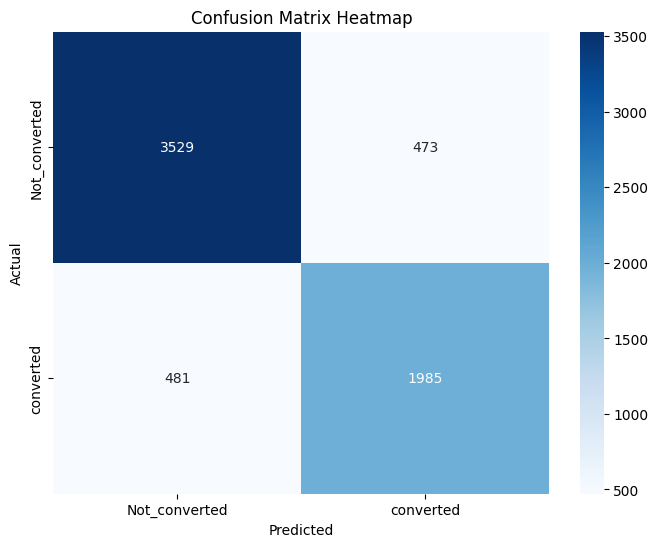

In [75]:
# Visualization of confusion matrix
confusion_matrix = np.array([[3529,  473],
       [ 481, 1985]])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not_converted', 'converted'],
            yticklabels=['Not_converted', 'converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [76]:
# Let's evaluate the other metrics as well

TP = confusion_p_r[1,1] # true positive
TN = confusion_p_r[0,0] # true negatives
FP = confusion_p_r[0,1] # false positives
FN = confusion_p_r[1,0] # false negatives

In [77]:
# Calculate Precision

print('Precision:',TP/(TP+FP))

# Calculate Recall

print('Recall:',TP/(TP+FN))

Precision: 0.807567127746135
Recall: 0.8049472830494728


Short summary on the model evaluation:

1. Accuracy:
 - Our model accurately predicts lead conversion with approximately 85% accuracy.

2. Sensitivity (Recall):
 - Our model correctly identifies around 80% of leads who actually converted.
 - This means we're effectively capturing most of the leads who are likely to convert.

3. Specificity:
 - Our model correctly identifies around 88% of leads who did not convert.
 - This means we're effectively minimizing false positives, preventing wasted resources on leads who are unlikely to convert.


4. Precision:
 - Our model has a precision of around 81%, which means that out of all the leads predicted to convert, around 81% actually did.
 - This indicates that our model is quite good at identifying leads who are likely to convert.


5. AUC (Area Under the ROC Curve):
 - The AUC of our model is approximately 0.92, which is considered very good.
 - This indicates that our model has a strong ability to distinguish between leads who will convert and those who will not.


 Business Implications:

 - We can effectively target leads who are more likely to convert, optimizing marketing efforts and resource allocation.
 - We can improve lead nurturing strategies to increase the chances of converting leads identified by the model.
 - We can reduce wasted resources on leads who are unlikely to convert, allowing us to focus on high-potential leads.
 - We can increase the overall conversion rate by identifying and targeting leads with a higher probability of converting.

 In conclusion, the model demonstrates a strong ability to predict lead conversion, which can have a significant positive impact on business outcomes.


### Step 8: Making Predictions on the Test Set

In [78]:
# scaling the continues variables of test data set
df_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(df_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [79]:
# test data describe
df_test.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  2772.000000  2772.000000                  2772.000000   
mean      0.395022     0.013454                     0.218582   
std       0.488944     0.013963                     0.242693   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.003984                     0.005722   
50%       0.000000     0.011952                     0.113556   
75%       1.000000     0.019920                     0.417694   
max       1.000000     0.215139                     0.991637   

       Page Views Per Visit  A free copy of Mastering The Interview  \
count           2772.000000                             2772.000000   
mean               0.043365                                0.314214   
std                0.038271                                0.464286   
min                0.000000                                0.000000   
25%                0.018182                                0.000000   
50%                0.036364                                0.000000   
75%                0.063636                                1.000000   
max                0.290909                                1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          2772.000000                2772.000000   
mean                              0.530303                   0.073593   
std                               0.499171                   0.261155   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
count              2772.000000                      2772.0   
mean                  0.007937                         0.0   
std                   0.088749                         0.0   
min                   0.000000                         0.0   
25%                   0.000000                         0.0   
50%                   0.000000                         0.0   
75%                   0.000000                         0.0   
max                   1.000000                         0.0   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 2772.000000           2772.000000         2772.000000   
mean                     0.283911              0.007937            0.300866   
std                      0.450975              0.088749            0.458717   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      1.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
count                 2772.0              2772.0             2772.000000   
mean                     0.0                 0.0                0.189394   
std                      0.0                 0.0                0.391892   
min                      0.0                 0.0                0.000000   
25%                      0.0                 0.0                0.000000   
50%                      0.0                 0.0                0.000000   
75%                      0.0                 0.0                0.000000   
max                      0.0                 0.0                1.000000   

       Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
count                 2772.000000                         2772.0   
mean                     0.133838         

In [80]:
# Dividing into X and Y sets for the test data set
y_test = df_test.pop('Converted')
X_test = df_test[X_train_rfe_new.columns]
print(y_test.shape)
print(X_test.shape)

(2772,)
(2772, 17)


In [81]:
# checking few rows in test data after keeping only required features that we got on final model of train data
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4269     0.031873                     0.444982              0.145455   
2376     0.000000                     0.000000              0.000000   
7766     0.019920                     0.025968              0.090909   
9199     0.000000                     0.000000              0.000000   
4359     0.000000                     0.000000              0.000000   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4269                          0                       0   
2376                          1                       0   
7766                          0                       0   
9199                          0                       1   
4359                          1                       0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
4269                             0                            0   
2376                             0                            0   
7766                             0                            0   
9199                             0                            0   
4359                             0                            0   

      Last Activity_SMS Sent  Last Notable Activity_Modified  \
4269                       1                               0   
2376                       1                               0   
7766                       0                               0   
9199                       0                               1   
4359                       0                               0   

      Last Notable Activity_Olark Chat Conversation  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_Unreachable  \
4269                                  0   
2376                                  0   
7766                                  1   
9199                                  0   
4359                                  0   

      Specialization_Hospitality Management  \
4269                                      0   
2376                                      0   
7766                                      0   
9199                                      0   
4359                                      0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      Lead Quality_High in Relevance  Lead Quality_Low in Relevance  \
4269                               0                              0   
2376                               0                              1   
7766                               0                              0   
9199                               0                              0   
4359                               0                              1   

      Lead Quality_Might be  Lead Quality_Worst  
4269                      0                   0  
2376                      0                   0  
7766                      1                   0  
9199                      0                   0  
4359                      0                   0

In [82]:
# adding constants
X_test_sm = sm.add_constant(X_test)

In [83]:
# predicting on test data
y_test_pred = Model_4.predict(X_test_sm)
y_test_pred

4269    0.522610
2376    0.980292
7766    0.867877
9199    0.080812
4359    0.931869
9186    0.961942
1631    0.868318
8963    0.360107
8007    0.041257
5324    0.925579
2558    0.203594
8973    0.073200
2935    0.638178
2907    0.854149
957     0.431671
493     0.931869
3179    0.674103
3545    0.040772
6140    0.063980
4877    0.644146
1734    0.191794
5319    0.918670
6208    0.159591
3144    0.028425
1264    0.314689
1557    0.719611
5440    0.458381
290     0.080812
4952    0.243873
1807    0.595035
8899    0.828156
8522    0.300472
5255    0.345080
8429    0.989382
2884    0.448205
2736    0.078289
8231    0.160756
2061    0.882314
1275    0.062892
7586    0.026271
1200    0.997293
5034    0.317248
7909    0.720524
6874    0.575341
8779    0.023398
937     0.305493
2909    0.252431
4467    0.198084
2553    0.242262
5638    0.965051
5235    0.057387
8876    0.119011
4245    0.636925
3854    0.964428
7631    0.950101
6675    0.139603
1903    0.066340
4588    0.182579
753     0.056955
7250    0.833581
6037    0.250351
5578    0.055742
702     0.184204
5865    0.060946
8714    0.058621
7156    0.919709
1333    0.058426
7333    0.416471
7751    0.052882
5895    0.760040
5716    0.182579
3289    0.971036
2671    0.182579
5466    0.428995
1251    0.057802
2716    0.565607
4204    0.047948
2369    0.080812
4175    0.355195
435     0.325747
1224    0.118377
5356    0.135064
2596    0.035286
5484    0.005726
3303    0.182579
3743    0.074115
8240    0.176800
7655    0.182579
6666    0.989462
8800    0.025645
8889    0.696648
3417    0.709011
5448    0.961634
1287    0.991864
8103    0.992692
731     0.378802
3444    0.989382
5352    0.070972
4509    0.048881
2392    0.956787
7230    0.784897
6017    0.938886
6292    0.012605
5363    0.959232
155     0.008117
6394    0.016054
3842    0.182579
7065    0.738827
8773    0.281328
6223    0.886311
7295    0.226396
5299    0.206219
2972    0.446532
3157    0.026973
659     0.803428
7476    0.988910
5523    0.009049
1876    0.066277
2447    0.186417
3700    0.041874
6227    0.063980
2820    0.227588
6984    0.973285
8424    0.165647
2877    0.625268
7659    0.004493
1106    0.773799
689     0.380882
9053    0.060195
4316    0.368588
6183    0.024633
8617    0.835411
5420    0.017495
7162    0.024173
5227    0.182579
6670    0.008030
5643    0.001268
8228    0.663356
3651    0.957698
322     0.005950
8499    0.935107
4956    0.288742
6418    0.908403
7017    0.182579
4350    0.087331
6908    0.014609
4829    0.070973
189     0.417109
8156    0.083620
4706    0.011057
3004    0.075796
6443    0.060906
4267    0.034834
5230    0.182579
6596    0.426921
5546    0.097514
8498    0.009705
4830    0.973457
8135    0.562307
4881    0.624836
4998    0.063980
7306    0.991864
7494    0.179569
646     0.046105
3108    0.080812
3192    0.952104
5521    0.044663
998     0.017924
9060    0.256277
4758    0.146881
2539    0.079994
4234    0.191965
4774    0.182579
723     0.044778
8381    0.148710
1598    0.387730
9046    0.965024
349     0.080812
991     0.141835
6800    0.521401
2451    0.420023
2236    0.125987
6054    0.303851
8479    0.826275
8259    0.006673
7130    0.157885
2913    0.929557
1365    0.909789
2501    0.249677
1611    0.081894
5269    0.448205
5978    0.308682
3517    0.032875
6687    0.977361
6569    0.188617
5710    0.028158
5793    0.988495
1610    0.145241
9122    0.080812
2529    0.012605
3595    0.080812
4733    0.909240
3206    0.068183
1719    0.109886
8064    0.025697
834     0.454521
8164    0.788554
1113    0.103706
74      0.091067
2109    0.760705
6318    0.301116
5103    0.030323
6066    0.985268
7425    0.080812
8099    0.959393
6681    0.001954
854     0.876237
3936    0.405519
2556    0.340789
3126    0.182579
4755    0.149504
4211    0.292939
4307    0.310978
4868    0.971015
8120    0.999301
7593    0.182579
2844    0.994791
7622    0.078394
2668    0.321952
4896    0.927640
2297    0.034688
6155    0.003838
173     0.054695
8900    0.187151
8340    0.139414
8794 

In [84]:
# Converting y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [85]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [86]:
# Reset index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_actual_pred_test = pd.concat([y_test_df, y_pred_1],axis=1)
y_actual_pred_test

Converted         0
0             1  0.522610
1             1  0.980292
2             1  0.867877
3             0  0.080812
4             1  0.931869
5             1  0.961942
6             1  0.868318
7             1  0.360107
8             0  0.041257
9             1  0.925579
10            0  0.203594
11            0  0.073200
12            1  0.638178
13            1  0.854149
14            1  0.431671
15            1  0.931869
16            1  0.674103
17            0  0.040772
18            0  0.063980
19            1  0.644146
20            0  0.191794
21            1  0.918670
22            0  0.159591
23            0  0.028425
24            1  0.314689
25            1  0.719611
26            0  0.458381
27            0  0.080812
28            1  0.243873
29            0  0.595035
30            1  0.828156
31            1  0.300472
32            1  0.345080
33            1  0.989382
34            1  0.448205
35            0  0.078289
36            0  0.160756
37            1  0.882314
38            0  0.062892
39            0  0.026271
40            1  0.997293
41            0  0.317248
42            1  0.720524
43            0  0.575341
44            0  0.023398
45            0  0.305493
46            0  0.252431
47            0  0.198084
48            0  0.242262
49            1  0.965051
50            0  0.057387
51            0  0.119011
52            1  0.636925
53            1  0.964428
54            1  0.950101
55            0  0.139603
56            0  0.066340
57            0  0.182579
58            0  0.056955
59            1  0.833581
60            1  0.250351
61            0  0.055742
62            0  0.184204
63            0  0.060946
64            1  0.058621
65            1  0.919709
66            0  0.058426
67            0  0.416471
68            0  0.052882
69            1  0.760040
70            0  0.182579
71            1  0.971036
72            0  0.182579
73            0  0.428995
74            0  0.057802
75            0  0.565607
76            1  0.047948
77            0  0.080812
78            0  0.355195
79            0  0.325747
80            0  0.118377
81            0  0.135064
82            0  0.035286
83            0  0.005726
84            0  0.182579
85            0  0.074115
86            0  0.176800
87            0  0.182579
88            1  0.989462
89            0  0.025645
90            1  0.696648
91            1  0.709011
92            1  0.961634
93            1  0.991864
94            1  0.992692
95            1  0.378802
96            1  0.989382
97            0  0.070972
98            0  0.048881
99            1  0.956787
100           1  0.784897
101           1  0.938886
102           0  0.012605
103           1  0.959232
104           0  0.008117
105           0  0.016054
106           0  0.182579
107           0  0.738827
108           0  0.281328
109           1  0.886311
110           0  0.226396
111           0  0.206219
112           0  0.446532
113           0  0.026973
114           1  0.803428
115           1  0.988910
116           0  0.009049
117           0  0.066277
118           0  0.186417
119           0  0.041874
120           0  0.063980
121           1  0.227588
122           1  0.973285
123           0  0.165647
124           1  0.625268
125           0  0.004493
126           1  0.773799
127           1  0.380882
128           0  0.060195
129           1  0.368588
130           0  0.024633
131           1  0.835411
132           0  0.017495
133           0  0.024173
134           0  0.182579
135           0  0.008030
136           0  0.001268
137           1  0.663356
138           1  0.957698
139           0  0.005950
140           1  0.935107
141           0  0.288742
142           1  0.908403
143           0  0.182579
144           0  0.087331
145           0  0.014609
146           0  0.070973
147           1  0.417109
148           0  0.083620
149           0  0.011057
150           0  0.075796
151           0  0.060906
152           0  0.034834
15

In [87]:
# Rename the column
y_actual_pred_test=y_actual_pred_test.rename(columns = {'Converted':'Actual_test', 0 : 'Conversion_Prob_test'})
y_actual_pred_test.head()

Actual_test  Conversion_Prob_test
0            1              0.522610
1            1              0.980292
2            1              0.867877
3            0              0.080812
4            1              0.931869

In [88]:
# Make predictions on the test set using 0.4 as the cutoff which we got from ROC
y_actual_pred_test['final_predicted_test_cutoff_0.4'] = y_actual_pred_test.Conversion_Prob_test.map(lambda x: 1 if x > 0.4 else 0)
y_actual_pred_test.head()

Actual_test  Conversion_Prob_test  final_predicted_test_cutoff_0.4
0            1              0.522610                                1
1            1              0.980292                                1
2            1              0.867877                                1
3            0              0.080812                                0
4            1              0.931869                                1

In [89]:
# Let's check the overall accuracy
metrics.accuracy_score(y_actual_pred_test['Actual_test'],y_actual_pred_test['final_predicted_test_cutoff_0.4'])

0.8517316017316018

In [90]:
# Confusion matrix for test data for cutoff 0.4
confusion_test = metrics.confusion_matrix(y_actual_pred_test['Actual_test'], y_actual_pred_test['final_predicted_test_cutoff_0.4'])
confusion_test

array([[1462,  215],
       [ 196,  899]])

In [91]:
TP = confusion_test[1,1] # true positive
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [92]:
# Calculate the sensitivity & specificity
print('sensitivity:',TP/(TP+FN))
print('specificity:',TN/(TN+FP))

sensitivity: 0.8210045662100457
specificity: 0.8717948717948718


As per the above results the model which i have created is able to predict results with good significance

In [93]:
# Now lets make predictions on the test set using 0.44 as the cutoff which we got from precision & recall view

y_actual_pred_test['final_predicted_test_cutoff_0.44'] = y_actual_pred_test.Conversion_Prob_test.map(lambda x: 1 if x > 0.44 else 0)
y_actual_pred_test.head()

Actual_test  Conversion_Prob_test  final_predicted_test_cutoff_0.4  \
0            1              0.522610                                1   
1            1              0.980292                                1   
2            1              0.867877                                1   
3            0              0.080812                                0   
4            1              0.931869                                1   

   final_predicted_test_cutoff_0.44  
0                                 1  
1                                 1  
2                                 1  
3                                 0  
4                                 1

#### We can consider any lead score based on the cutoff value of 0.4 & 0.44 for the score of 0 to 100 which was predicted by the model. Kindly refer above data frame

In [94]:
# Let's check the overall accuracy

metrics.accuracy_score(y_actual_pred_test['Actual_test'],y_actual_pred_test['final_predicted_test_cutoff_0.44'])

0.8531746031746031

In [95]:
# Confusion matrix for test data for cutoff 0.44
confusion_test_p_r = metrics.confusion_matrix(y_actual_pred_test['Actual_test'], y_actual_pred_test['final_predicted_test_cutoff_0.44'])
confusion_test_p_r

array([[1487,  190],
       [ 217,  878]])

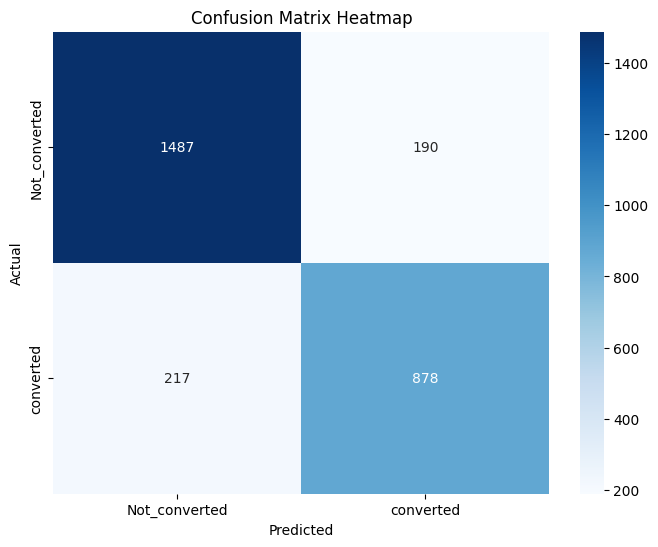

In [96]:
# Visualization of confusion matrix for test data
confusion_matrix = np.array([[1487,  190],
       [ 217,  878]])
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not_converted', 'converted'],
            yticklabels=['Not_converted', 'converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [97]:
TP = confusion_test_p_r[1,1] # true positive
TN = confusion_test_p_r[0,0] # true negatives
FP = confusion_test_p_r[0,1] # false positives
FN = confusion_test_p_r[1,0] # false negatives

In [98]:
# Calculate Precision

print('Precision:',TP/(TP+FP))

# Calculate Recall

print('Recall:',TP/(TP+FN))

Precision: 0.8220973782771536
Recall: 0.8018264840182648


FIndings:
1. Accuracy:
 - The model accurately predicts lead conversion with approximately 85% accuracy on the test data.
 - This means that the model can correctly identify whether a lead will convert or not in 85% of cases.

2. Sensitivity (Recall):
 - The model correctly identifies around 80% of leads who actually converted on the test data.
 - This is a good indicator that the model is effectively capturing most of the leads who are likely to convert.

3. Specificity:
 - The model correctly identifies around 88% of leads who did not convert on the test data.
 - This means that the model is effectively minimizing false positives, preventing wasted resources on leads who are unlikely to convert.

4. Precision:
 - The model has a precision of around 81% on the test data, which means that out of all the leads predicted to convert, around 81% actually did.
 - This indicates that the model is quite good at identifying leads who are likely to convert.

Business Implications:

- The model can be used to effectively target leads who are more likely to convert, optimizing marketing efforts and resource allocation.
- It can help improve lead nurturing strategies to increase the chances of converting leads identified by the model.
- It can reduce wasted resources on leads who are unlikely to convert, allowing the business to focus on high-potential leads.
- It can increase the overall conversion rate by identifying and targeting leads with a higher probability of converting.

## Summary & Recommendation

I would like to summarize that the model which was created is predicting the values with good significance level of 80% and this level is matching with CEO requirement.

Below are the highlights on the features on which the company needs to pay attention

Features:
- Total Visits: An increase in the total number of visits to the website has a significant positive effect on the likelihood of conversion.

- Total Time Spent on Website: More time spent on the website also strongly correlates with higher chances of conversion. This suggests that engaged leads who spend more time exploring are more likely to convert.

- Lead Origin_Lead Add Form: Leads originating from a form submission are more likely to convert compared to those from other origins. This indicates that filling out a form is a strong signal of interest.

- Lead Source_Olark Chat: Leads from Olark Chat are positively associated with conversion, implying that interactions via chat can enhance conversion chances.

- Lead Source_Welingak Website: Leads from the Welingak website have a high positive influence on conversion, indicating the effectiveness of this lead source.

- Last Activity_SMS Sent: Sending an SMS to leads is positively associated with conversion, suggesting that follow-up via SMS improves conversion likelihood.

- Last Notable Activity_Unreachable: Despite being classified as unreachable, this variable positively affects conversion, possibly indicating that leads previously deemed unreachable may still convert under certain conditions.

- What is your current occupation_Working Professional: Working professionals are more likely to convert, which suggests this demographic may be more inclined or able to make purchasing decisions.

- Lead Quality_High in Relevance: Leads classified as high in relevance are highly likely to convert. This variable has one of the highest positive coefficients, showing that high relevance is a strong predictor of conversion.

- Lead Quality_Might be: Leads categorized as "Might be" are positively associated with conversion, indicating some potential for these leads.

2. Negative Influences on Conversion:

- Page Views Per Visit: Fewer page views per visit negatively impact the conversion probability, suggesting that fewer interactions with the site correlate with lower conversion chances.

- Last Activity_Email Bounced: Leads with bounced emails have a reduced likelihood of conversion, reflecting that communication issues negatively impact conversion chances.

- Last Notable Activity_Modified: Modification activity has a negative impact, possibly indicating that leads requiring modifications are less likely to convert.

- Last Notable Activity_Olark Chat Conversation: Despite the positive influence of the source, if the conversation is categorized under notable activities, it might not positively influence conversion.

- Specialization_Hospitality Management: Leads with a specialization in hospitality management are less likely to convert, suggesting that this specialization may not align well with the offerings or target audience.

- Lead Quality_Worst: Leads classified as "Worst" have a significantly negative effect on conversion, which aligns with expectations as these leads are the least likely to convert.

Group Case study by:
1. Vaddi Pradeep Satya Chandra
2. Rishabh Salekar
3. Utkarsh Pandey